# Vraisemblance

## Quelques aspects techniques avant de commencer

Il est très important de faire tourner la section ci-dessous, même si d'un point de vue pratique elle ne fait que préparer les instruments dont nous allons nous servir plus tard dans le document.


In [8]:
# library utilisée pour faire le graphique
# install.packages("ggplot2") # installation, à faire une seule fois
library(ggplot2) # chargement

# couleur pour le graphique
darkred  = "#8B0000"   


## Exemple avec la binomiale

Nous pouvons nous referer à notre exemple du traitement pour des troubles d'addiction aux substance dans lequel on mésure la rechute à 6 mois après le traitement.

Nous avons 10 personnes qui ont suivit le traitement et 3 de ces personnes ont eu une rechute à 6 mois.

Dans ce cas la ce que nous avons c'est :

* les données observées $x = 3$, $n = 10$
* un modèle $Binomiale$

C'est que nous cherchons c'est de estimer le paramètre de probabilité de rechute $\$theta$ qui maximise la vraisemblance de nous données observée. Cela ce processus c'est l'estimation de la vraisemblance maximale (*Maximum Liklihood Estimation*; MLE).

Et nous pouvons essayer de l'implémenter dans différente manières

### 1. Par essais et erreurs

Nous allons utiliser notre fonction `dbinom` et calculer la probabilité des nos données avec différent valeurs du paramètre $\theta$ comme par example
$theta = 0.1$

In [10]:
dbinom(x=3, size = 10, prob =0.1)

[1] 0.05739563

In [ ]:
ou $theta = 0.3$

In [12]:
dbinom(x=3, size = 10, prob =0.3)

[1] 0.2668279

In [ ]:
ou encore $theta = 0.9$

In [14]:
dbinom(x=3, size = 10, prob =0.9)

[1] 8.748e-06

### 2. Avec un exploration systematique de tous les valeurs possible du paramètre

Nous pouvons écrire un fonction pour ce set de données, dans la quelle on rentre en input la valeur du paramètre $\theta$ et nous obtenons en output la vraisemblance comme il suit, il faudra executer le code suivant pour déclarer la function:


In [22]:
lik.fun <- function(parameter) {
  ll <- dbinom(x = 3, size = 10, prob = parameter)
  return(ll)
}

Et ensuite nous pouvons l'utiliser pour faire un recherche systematique du paramètre qui maximise la vraisamblance de nos données étant donnée notre modèle.
Pour cela faire cela nous allons créer un vecteur qui contient tout les valeur possible de notre paramètre $\theta$ entre 0 et 1 avec des intérval de 0.001:


In [24]:
# sequence des valeurs possibles du paramètre
p_seq <- seq(0, 1, by = 0.001)

Après nous allons appliquer notre function pour calculer la vraisemblence de tout se possible valeur:

In [26]:
# Calcule la vraisembalance pour chaque valeur
lik_values <- sapply(p_seq, lik.fun)

Ensuite nous pouvons créer un representation graphique de la vraisemblance en fonction de chaque valeur possible du paramètre:

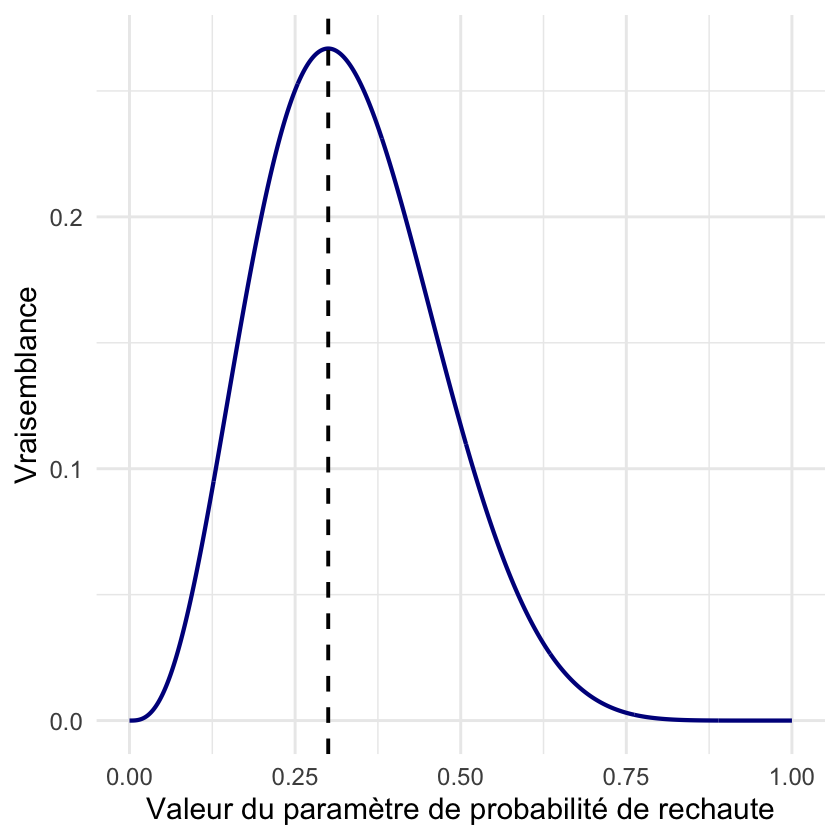

In [42]:
# mettre le tout dans une dataframe
df <- data.frame(prob = p_seq, likelihood = lik_values)

# faire le graphique
ggplot(df, aes(x = prob, y = likelihood)) +
  geom_line(color = "darkblue", linewidth = 1.2) +
  geom_vline(xintercept = 3/10, linetype = "dashed", color = "black", linewidth = 1.1) +
  labs(
    x = "Valeur du paramètre de probabilité de rechaute",
    y = "Vraisemblance"
  ) +
   theme_minimal(base_size = 18) 


La valeur maximale de la vraisemblance de nos données c'est avec un paramètre de probabilité de rechute $\theta = 0.3$.



### 3. Utilisation d' algorithms d'optimisation

Même si cette approche systèmatique marche très bien dans notre cas, il est rarement applicable dans des modèles plus complexes, ou par example nous avec plusieurs combinaisons de paramètres à estimer.

Dans la plus par des cas d'estimation de la vraisemblance nous faisons appelle à des algorithms d'optimisation en combinaison avec la fonction que nous avons crée au paravent et qui contien notre modèle `dbinom` avec nos donnée $x=3$ et $n=10$.

L'algorithm d'optimisation vas nos rendre la valeur du paramètre $\theta$ qui maximise la vraisemblance `$maximum` et la vraisemblance maximale `$objective`


In [51]:
optimize(lik.fun,c(0,1),maximum=TRUE)

$maximum
[1] 0.3000157

$objective
[1] 0.2668279